## Stats 211 Problem set 2

[Carmen Salazar]

[Charlie's grant and loan repayment data] 

[02/19/2020]

### 1. Explain any new or revised hypotheses for interval ratio data from your own project or from Charlie's grant and loan repayment data

[Your answer here should explain:
1. What are your dependent variables? Why do they interest you?
2. What are your independent variables? What direction to you hypothesize will be the relationship between your dependent variable and your dependent variables?
3. Why do you think your dependent variables are associated with your independent variables?
4. What are your control variables? Do you think they will show any spurious, intervening, or interactive relationships? Why?]

If you are working with the grant and loan repayment data, formulate hypotheses about:
1. The relationship between state grant aid per student and the level of research at a university
2. The relationship between loan repayment and college net price for low-income students. The later variable is name **netprice4lowincome**

Hypothesis about: 

1.State grant aid per student increases if they attend an institution that emphasizes research.
An increase in state funding per student creates more opportunities to work with professors and industry experts. By conducting research, students can potentially publish their findings, be awarded fellowships, awards, and exclusive career opportunities.

2.An increase in college net price for low-income students (that includes forms of financial aid that a student does not have to repay) allows students the opportunity to owe a smaller precent of loan repayment.

*The dependent variable is percent of loan repayment, independent variable is college net price for low-income students. 


### 2. Setting up your session

In the code cell below, do the following:

1. set current directory 
2. set more off 
3. create log file 
4. download the data from its source if it's available online
5. read the data in [preferably only variables you are going to use]

In [6]:
cd "/Users/karminsalazar/Desktop/Masters Thesis"

capture log close

log using problem_set2_log20200219.log

insheet using grants2015_college_affordability20200218.csv, clear

rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)


qui sort hgroup
qui label var sgrnt_low "state grant aid per low income student"
qui label var hgroup "research level"

collapse (mean) mn_sgrnt_low= sgrnt_low (semean) se_sgrnt_low=sgrnt_low, by(hgroup)

gen hisgrnt_low = mn_sgrnt_low + 1.96 * se_sgrnt_low 
gen losgrnt_low = mn_sgrnt_low - 1.96 * se_sgrnt_low

In [7]:
describe
*describe, browse if _n< or less than or greater than _n 
*(^ another possibility for analyzing the variables)
*tab sgrnt_low_inc


Contains data
  obs:             4                          
 vars:             5                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
hgroup          long    %9.0g      hgroup     research level
mn_sgrnt_low    float   %9.0g                 (mean) sgrnt_low_inc
se_sgrnt_low    float   %9.0g                 (semean) sgrnt_low_inc
hisgrnt_low     float   %9.0g                 
losgrnt_low     float   %9.0g    

### 3. Create a bar graph with confidence interval whiskers

Create a bar graph that compares interval ratio data for a dependent variable across different nominal categories from an independent variable. If you are using Charlie's data, do this for the state grant aid per low income student variable name **sgrnt_low**

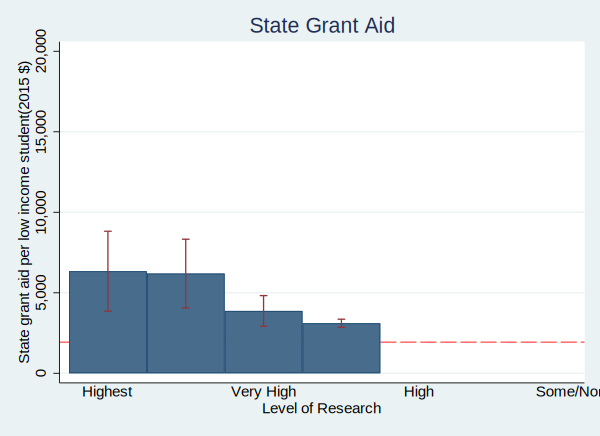

In [8]:
graph twoway (bar mn_sgrnt_low hgroup) ///
(rcap hisgrnt_low losgrnt_low hgroup), ///
xlabel( 1 "Highest" 3 "Very High" 5 "High" 7 "Some/None", noticks) ///
ytitle("State grant aid per low income student(2015 $)") ///
ylabel(0(5000)20000, format(%10.0fc)) ///
xtitle("Level of Research") legend(off) name(igrntbar, replace) ///
title("State Grant Aid") ///
yline(1936.825, lp(_) lcolor(red) lstyle(foreground))

### 4. Summarize what you learned from the bar graph

Do the confidence intervals overlap across categories or not? What does this mean?

Error bars indicate the estimated error or uncertainty to give a sense of how percise a measurement is. In the bar graph above, the confidence intervals overlap across categories of research. This means data from one group is not different from another. It is therefore inconclusive.

### 4. Estimate OLS regression statistics for the relationship between two interval ratio variables and ouput the table below

If you use Charlie's data, use the loan repayment variable and the **netprice4lowincome** variable.

In [34]:
import delimited using loanrepay2013_highestresearch.csv, clear case(preserve)

In [38]:
describe


Contains data
  obs:            33                          
 vars:            19                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
opeid           long    %12.0g                
acceptrate      float   %9.0g                 
Y_lo_inc_rpy    float   %9.0g                 
lo_inc_debt_mdn float   %9.0g                 
instnm          str43   %43s                  
stabbr          str2    %9s               

In [39]:
reg Y_lo_inc_rpy netprice4lowi~e
*regress loan repayment variable (Y) netprice4lowincome variable (X)


      Source |       SS           df       MS      Number of obs   =        33
-------------+----------------------------------   F(1, 31)        =      8.48
       Model |  473.546336         1  473.546336   Prob > F        =    0.0066
    Residual |  1730.93895        31  55.8367402   R-squared       =    0.2148
-------------+----------------------------------   Adj R-squared   =    0.1895
       Total |  2204.48528        32  68.8901651   Root MSE        =    7.4724

------------------------------------------------------------------------------------
      Y_lo_inc_rpy |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------------+----------------------------------------------------------------
netprice4lowincome |  -.0011662   .0004005    -2.91   0.007    -.0019829   -.0003495
             _cons |   76.56364   3.782187    20.24   0.000     68.84982    84.27746
------------------------------------------------------------------------------------


### 5. Interpret the output

1. What is the coefficient for your independent variable? What does it say about the size and direction of the relationship you estimated?

2. What is the p-value for the coefficient for your independent variable? What does it indicate about how much confidence we can have in the estimated relationship?

3. What is the $r^2$ coefficient of determination? What does it say about how much variation in your dependent variable is explained by the independent variable?

4. What is the F-ratio for your $r^2$. What does it indicate about how much confidence we can have in the $r^2$ estimate?



In [ ]:
1. The coefficient for my independent variable is -.0011662. This means the net price for low income students
is negatively correlated with loan repayment.

2. The p-value for the coefficient for my independent variable is 0.007. Because the p-value is less
than .05, we reject the null hypothesis, meaning there are real differences between groups being studied. 
Because the p-value is very small, our data suggests it is less likely that the groups being studied are the same.

3. The r-squared coefficient of determination is 0.2148. 
This means that 21.48% of the variation in loan repayment is explained by net price for low-income students.
This leaves about 78% of which is not explained, or error in our model.

4. The F-ratio for my r-squared is 0.0066. The F-ratio is the ratio of the between group
variance to the within group variance. It is determined by rejecting or accepting the 
null hypothesis, which determines whether or not there are no differences between groups.
Since alpha level is > p-value, we cannot accept H0.

### 6. Illustrate the OLS relationship with a scatter plot that includes a fitted line

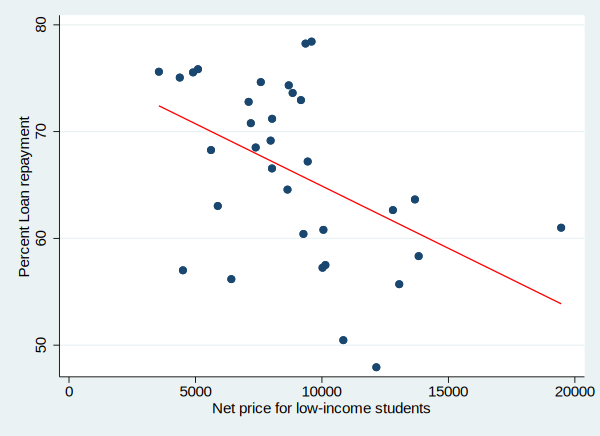

In [44]:
tw (scatter Y_lo_inc_rpy netprice4lowi~e) ///
(lfit Y_lo_inc_rpy netprice4lowi~e, color(red)), ///
ytitle("Percent Loan repayment") ///
xtitle("Net price for low-income students") legend(off)